# Evaluating a classification model

In [5]:
import os
os.getcwd()

'C:\\Users\\90712\\ScikitLearn_DataSchool'

In [8]:
import pandas as pd
data_path='C:\\Users\\90712\\ScikitLearn_DataSchool/pima-indians-diabetes.data'
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima=pd.read_csv(data_path,header=None,names=col_names)

In [9]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
feature_cols=['pregnant','insulin','bmi','age']
X=pima[feature_cols]
y=pima.label

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred_class=logreg.predict(X_test)

In [15]:
#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.6770833333333334


# Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [16]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [17]:
y_test.mean()

0.3229166666666667

In [18]:
1-y_test.mean()

0.6770833333333333

In [19]:
#calculate null accuracy(for binary classification problems codes as 0/1)
max(y_test.mean(),1-y_test.mean())

0.6770833333333333

In [20]:
#calculate null accuracy(for multi-class classification problems)
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

# Confusion matrix: Table that describes the performance of a classification model

In [21]:
# IMPORTANT: first argument is true values, second argument is predicted values
metrics.confusion_matrix(y_test,y_pred_class)

array([[114,  16],
       [ 46,  16]], dtype=int64)

# 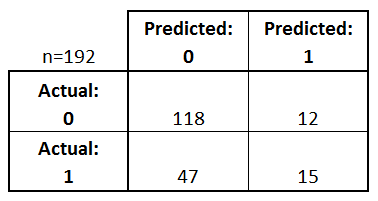

Basic terminology


・True Positives (TP): we correctly predicted that they do have diabetes--->15

・True Negatives (TN): we correctly predicted that they don't have diabetes--->118

・False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")--->12

・False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")--->47

In [22]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# 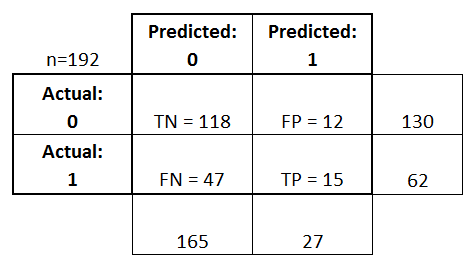

# Metrics computed from a confusion matrix

① Classification Accuracy: Overall, how often is the classifier correct?

In [23]:
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test,y_pred_class))

0.6770833333333334
0.6770833333333334


② Classification Error (Misclassification Rate): Overall, how often is the classifier incorrect?

In [24]:
print((FP+FN)/float(TP+TN+FP+FN))
print(1-metrics.accuracy_score(y_test,y_pred_class))

0.3229166666666667
0.32291666666666663


③ Sensitivity ("True Positive Rate" or "Recall"): When the actual value is positive, how often is the prediction correct?

In [25]:
print(TP/float(TP+FN))
print(metrics.recall_score(y_test,y_pred_class))

0.25806451612903225
0.25806451612903225


④ Specificity ("specific" or "selective" ): When the actual value is negative, how often is the prediction correct?

In [27]:
print(TN/float(TN+FP))

0.8769230769230769


⑤ False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [28]:
#1-Specificity
print(FP/float(TN+FP))

0.12307692307692308


⑥ Precision: When a positive value is predicted, how often is the prediction correct?

In [30]:
print(TP/float(TP+FP))
print(metrics.precision_score(y_test,y_pred_class))

0.5
0.5


# Adjusting the classification threshold

In [31]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [32]:
logreg.predict_proba(X_test)[0:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [35]:
y_pred_prob=logreg.predict_proba(X_test)[:,1]

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=14

Text(0, 0.5, 'Frequency')

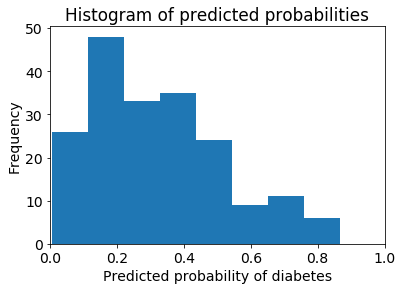

In [37]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [41]:
from sklearn.preprocessing import binarize
y_pred_class=binarize([y_pred_prob],0.3)[0]

In [42]:
y_pred_prob[:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [43]:
y_pred_class[:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [44]:
print(confusion)

[[114  16]
 [ 46  16]]


In [45]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[82 48]
 [17 45]]


In [49]:
# sensitivity has increased (used to be 0.24)
print(45 / float(45 + 17))

0.7258064516129032


In [48]:
# specificity has decreased (used to be 0.91)
print(82 / float(82 + 48))

0.6307692307692307


・Adjusting threshold should be the last step for model modification

・Sensitivity and specificity have an inverse relationship

# ROC Curves and Area Under the Curve (AUC)

--->ROC curve can help you to choose a threshold that balances sensitivity and specificity

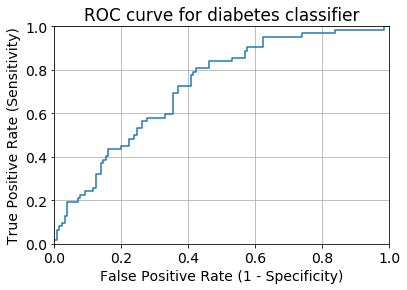

In [50]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [55]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [56]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [57]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


・AUC is the percentage of the ROC plot that is underneath the curve

・AUC is useful as a single number summary of classifier performance.

・AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [62]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


In [63]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225